In [1]:
## Import the library to view the dataset

from osgeo import gdal 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


data = gdal.Open('Clipped_Greenland_EPSG3413.tif')
metadata= data.GetMetadata()
print(metadata)

## Read the data set as an array file
data_array = data.GetRasterBand(1).ReadAsArray()

{'AREA_OR_POINT': 'Area', 'DataType': 'Generic'}


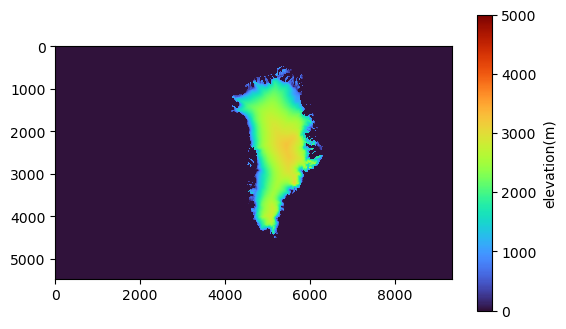

In [2]:
## Plot the figure
plt.Figure(figsize=(10,10))
plt.imshow(data_array,vmin=0, vmax=5000,cmap = 'turbo')
cbar = plt.colorbar(label='elevation(m)',shrink=0.8)

In [3]:
%%bash
gdalinfo 'Clipped_Greenland_EPSG3413.tif'

Driver: GTiff/GeoTIFF
Files: Clipped_Greenland_EPSG3413.tif
Size is 9342, 5471
Coordinate System is:
PROJCRS["WGS 84 / NSIDC Sea Ice Polar Stereographic North",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["US NSIDC Sea Ice polar stereographic north",
        METHOD["Polar Stereographic (variant B)",
 

In [7]:
# Show the available "public" methods and attributes provided by `rioxarray`:
import xarray as xra
ds = xra.open_dataset('Clipped_Greenland_EPSG3413.tif')
print([i for i in dir(ds.rio) if not i.startswith('_')])

# ---------------------------------------------------------------------------
# Show the available "public" units on `rioxarray`'s `crs` interface
print([i for i in dir(ds.rio.crs) if not i.startswith('_')])

['bounds', 'clip', 'clip_box', 'count', 'crs', 'estimate_utm_crs', 'get_gcps', 'grid_mapping', 'height', 'interpolate_na', 'isel_window', 'pad_box', 'reproject', 'reproject_match', 'resolution', 'set_attrs', 'set_crs', 'set_encoding', 'set_spatial_dims', 'shape', 'slice_xy', 'to_raster', 'transform', 'transform_bounds', 'update_attrs', 'update_encoding', 'vars', 'width', 'write_coordinate_system', 'write_crs', 'write_gcps', 'write_grid_mapping', 'write_transform', 'x_dim', 'y_dim']
['data', 'from_authority', 'from_dict', 'from_epsg', 'from_proj4', 'from_string', 'from_user_input', 'from_wkt', 'get', 'is_epsg_code', 'is_geographic', 'is_projected', 'is_valid', 'items', 'linear_units', 'linear_units_factor', 'to_authority', 'to_dict', 'to_epsg', 'to_proj4', 'to_string', 'to_wkt', 'units_factor', 'wkt']


In [9]:
## The data is reprojected into the polar stereographic coordinates, that's why the units would be seen in meters
print(f'CRS: {ds.rio.crs}')
print(f'Units: {ds.rio.crs.linear_units}')
print(f'Bounds: {ds.rio.bounds()}')
print(f'Height: {ds.rio.height}')
print(f'Width: {ds.rio.width}')
print(f'Grid pixel resolution: {ds.rio.resolution()}')

CRS: EPSG:3413
Units: metre
Bounds: (-3295086.636054593, -3935100.5571963256, 2781642.4347768715, -376356.73932874453)
Height: 5471
Width: 9342
Grid pixel resolution: (650.474103064811, -650.474103064811)
